# **INTRODUCCIÓN:**

La cefazolina es el antibiótico recomendado en pacientes con endocarditis y bacteriemias por *Staphylococcus aureus* meticilino sensible (SAMS)([Li 2017](https://pubmed.ncbi.nlm.nih.gov/28035690/)).

Aunque la cefazolina es una opción de tratamiento común, existen cepas de SAMS que son mas resistentes a la cefazolina cuando se prueban en condiciones de alto inóculo bacteriano.

Este efecto llamado CzIE("Cefazolin Inoculum Effect"), es un fenómeno que se asocia con fracaso del tratamiento con cefazolina, y un aumento en la mortalidad de los pacientes que sufren estas infecciones ([Miller 2018](https://academic.oup.com/ofid/article/5/6/ofy123/5003417)).

Aunque el mecanismo de CzIE aún no está bien caracterizado, se piensa que está mediado por la expresión de la β-lactamasa estafilocócica BlaZ, y se ha asociado a variantes específicas de esta enzima.

Los tipos de la betalactamasa BlaZ se definen por los aminoácidos presentes en las posiciones 128 y 216 de la enzima (cerca del sitio activo), ([Voladri 1996](https://journals.asm.org/doi/epdf/10.1128/jb.178.24.7248-7253.1996), [Voladri 1998](https://journals.asm.org/doi/10.1128/AAC.42.12.3163)). 

Hay descriptos 6 tipos de BlaZ (A, B, C, D, E, F) ([Harrison 2019](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7611363/pdf/EMS83234.pdf)), pero no se conoce si al día de la fecha se depositaron  secuencias con nuevas variantes de la enzima.

# **OBJETIVO:**

### Conocer el tipo de BlaZ de *S. aureus* depositadas en NCBI con el fin de:

A- Ver si hay depositadas en la base de datos alguna proteína con potencial nuevo tipo de blaZ

B- Armar una base de datos de secuencias de esta proteína para posteriormente estudiar su filogenia

# **METODOLOGÍA y RESULTADOS:**

## A- Ver si hay depositadas en la base de datos alguna proteína con potencial nuevo tipo de BlaZ

### 1. Preparación del entorno



In [2]:
import pandas as pd                 #para generar el dataframe de blaZ de cada secuencia y analizar los resultados
!pip3 install --upgrade Biopython   #INSTALAR BIOPYTHON

from Bio import SeqIO               #para poder manejar secuencias en formato fasta
from Bio import Entrez              #para poder descargar secuencias desde el servidor de ncbi
import yaml                         #Para evitar compartir información sensible

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.8 MB/s eta 0:00:00


### 2. Búsqueda de secuencias proteicas de BlaZ en la base de datos protein de NCBI (Secuencias de Refseq)

Completar el archivo config.yaml con la dirección de correo electrónico

Buscar los números de acceso con Entrez.search

In [ ]:
with open("/content/config.yaml")as f:   #este se ejecuta para cargar el archivo config.yaml con la dirección de correo electrónico
    config= yaml.safe_load(f)
    
#buscar BlaZ de Staphylococcus aureus (taxon id= 1280) anotados de refseq en la base de datos de proteinas de ncbi y obtener una lista con sus numeros de acceso
handle = Entrez.esearch(db="protein", 
                        retmax=300,  #ponemos como límite máximo que busque las primeras 300 secuencias
                        term="txid1280[ORGN] AND blaZ AND refseq[filter]", #search using an NCBI taxon identifier (1280 for Stahylococcus aureus)
                        idtype="acc")
record_accession = Entrez.read(handle)
record_accession['IdList']

Hay 263 secuencias de BlaZ de *S. aureus* depositadas en la base de datos de proteínas de NCBI (Refseq)

In [6]:
record_accession["Count"]

'263'

In [7]:
len(record_accession['IdList'])

263

Obtener las secuencias con Entrez.efetch

In [12]:
with open("/content/config.yaml")as f:   #ESTE SE EJECUTA SI TENEMOS UN ARCHIVO YAML
    config= yaml.safe_load(f)

#obtener las secuencias fasta de dichos números de acceso.
accession_list = record_accession['IdList']
blaZ_sequences = Entrez.efetch(db="protein",
                       id=record_accession['IdList'],
                       rettype="fasta",
                       retmode="text")

Parsear las secuencias de BlaZ y luego guardarlas como un archivo multi .fasta

In [13]:
parse_blaZ_sequences = SeqIO.parse(blaZ_sequences, "fasta")
output_name = "BlaZ_sequences.fasta"

In [14]:
SeqIO.write(parse_blaZ_sequences,output_name, "fasta" )

263

### 3. Descargar el archivo de secuencias y realizar un alineamiento con *MAFFT* sumando secuencias de BlaZ de referencia (tipo A, tipo B, tipo C, y tipo D), 

Descargar el archivo multifasta y agregar la secuencia presente en el archivo **BlaZ_typeA.fasta** con un editor de texto. 

El archivo **BlaZ_typeA.fasta** contiene la β-lactamasa de tipo A (número de acceso de GenBank EVL36279). Agregar esta secuencia como control permite generar un alineamiento para poder definir la posiciones 128 y 216 con mayor claridad. 


Realizar el alineamiento con MAFFT con parámetros por default (puede utilizarse la versión 7 presente el servidor https://mafft.cbrc.jp/alignment/server/).

Luego de realizar el alineamiento, editarlo para quitar la secuencia de referencia y que solo queden las secuencias de interés.

### 4. Leer el alineamiento de secuencias obtenido, y pasarlas a una lista que las contenga

In [27]:
#subir el alineamiento al entorno del colabnotebook, copiar la ruta en la que se encuentra y asignarla a filename.
filename = "/content/blaZ_sequences-aligned.fasta"

#leer alineamiento de secuencias FASTA y pasarlas a una lista que las contenga
sequences = [i for i in SeqIO.parse(filename, "fasta")]

#verifica que se genera una lista 
type(sequences)
print(sequences)

[SeqRecord(seq=Seq('-------------------ALVLSACNSTSSHAKELNNLEKKYNANIGVYALDT...---'), id='WP_271285542.1', name='WP_271285542.1', description='WP_271285542.1 penicillin-hydrolyzing class A beta-lactamase BlaZ, partial [Staphylococcus aureus]', dbxrefs=[]), SeqRecord(seq=Seq('---------MKKLIFLIVIALILSACNSNSSHAKELNDLEKKYNAHIGVYALDT...---'), id='WP_271057344.1', name='WP_271057344.1', description='WP_271057344.1 penicillin-hydrolyzing class A beta-lactamase BlaZ [Staphylococcus aureus]', dbxrefs=[]), SeqRecord(seq=Seq('---------MKKLIFLIVMALVLSACNSNSSHAKELNDLEKKYNAHIGVYALDT...---'), id='WP_268560071.1', name='WP_268560071.1', description='WP_268560071.1 penicillin-hydrolyzing class A beta-lactamase BlaZ [Staphylococcus aureus]', dbxrefs=[]), SeqRecord(seq=Seq('---------MKKLILLIAIALVLSACNSTSTHTKELNNLEKKYNANIGVYALDT...---'), id='WP_002457930.1', name='WP_002457930.1', description='WP_002457930.1 MULTISPECIES: penicillin-hydrolyzing class A beta-lactamase BlaZ [Staphylococcus]', dbxrefs=[]), Seq

### 5. Generar un dataframe con pandas que contenga, id de secuencia, aminoácido en posición 128, aminoácido en posición 216 y tipo de BlaZ

In [ ]:
#armar una lista con el nombre de cada secuencia
id_list =[]
for sequence in sequences:
  list.append(id_list, sequence.id)
id_list

In [15]:
type(str(sequence.seq))

str

In [18]:
#funcion para armar una lista con los aminoacidos presentes en la posicion 128
def get_position_128(sequences):
  position_128=[]
  for sequence in sequences:
    list.append(position_128, str(sequence.seq)[127])
  return position_128

In [ ]:
get_position_128(sequences)

In [20]:
#funcion para armar una lista con los aminoacidos presentes en la posicion 216 de una determinada secuencia
def get_position_216(sequences):
  position_216 =[]
  for sequence in sequences:
    list.append(position_216, str(sequence.seq)[215])
  return position_216

In [ ]:
get_position_216(sequences)

In [22]:
#armar un dataframe que contenga como columnas nombre_de_secuencia, posicion_128 y posicion_216
blaZ_df= pd.DataFrame()
blaZ_df["id"] = id_list
blaZ_df["position_128"] = get_position_128(sequences)
blaZ_df["position_216"] = get_position_216(sequences)

blaZ_df

,id,position_128,position_216
0,WP_271285542.1,K,N
1,WP_271057344.1,T,S
2,WP_268560071.1,T,N
3,WP_002457930.1,K,N
4,WP_267842202.1,A,S
...,...,...,...
258,WP_000733271.1,T,S
259,WP_000733270.1,T,S
260,WP_000733269.1,T,S
261,WP_000733268.1,T,S


In [24]:
#generar otra columna que diga el tipo de blaZ segun las posiciones 128 y 216
#type A: 128:T, 216:S; 
#type B: 128:K, 216:N; 
#type C: 128:T, 216:N; 
#type D: 128:A, 216:S; 
#type E : 128:L, 216:S;
#type F : 128:A, 216:N

def get_blaZ_type(one_sequence):
  if one_sequence["position_128"] == "T" and one_sequence["position_216"] == "S":
    return "A"
  elif one_sequence["position_128"] == "K" and one_sequence["position_216"] == "N":
    return "B"
  elif one_sequence["position_128"] == "T" and one_sequence["position_216"] == "N":
    return "C"
  elif one_sequence["position_128"] == "A" and one_sequence["position_216"] == "S":
    return "D"
  elif one_sequence["position_128"] == "L" and one_sequence["position_216"] == "S":
    return "E"
  elif one_sequence["position_128"] == "A" and one_sequence["position_216"] == "N":
    return "F"
  else:
    return "Non typable"
  

blaZ_df["BlaZ_type"] = blaZ_df.apply(get_blaZ_type, axis="columns")

In [25]:
blaZ_df

,id,position_128,position_216,BlaZ_type
0,WP_271285542.1,K,N,B
1,WP_271057344.1,T,S,A
2,WP_268560071.1,T,N,C
3,WP_002457930.1,K,N,B
4,WP_267842202.1,A,S,D
...,...,...,...,...
258,WP_000733271.1,T,S,A
259,WP_000733270.1,T,S,A
260,WP_000733269.1,T,S,A
261,WP_000733268.1,T,S,A


### 6. Analizar y visualizar los resultados con pandas

<AxesSubplot:>

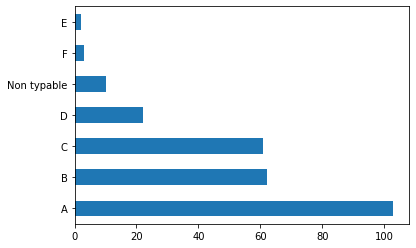

In [24]:
#analisis y visualizacion de resultados
blaZ_df['BlaZ_type'].value_counts().plot.barh()

In [25]:
blaZ_df['BlaZ_type'].value_counts()

A              103
B               62
C               61
D               22
Non typable     10
F                3
E                2
Name: BlaZ_type, dtype: int64

Hay 10 secuencias no tipables.
 
Obtener un dataframe con solo las secuencias no tipables, para mirar en detalle que aminoácido es el que está en cada posición (128 y 216) 

In [26]:
non_typable = blaZ_df[blaZ_df['BlaZ_type'] == "Non typable"]
non_typable

,id,position_128,position_216,BlaZ_type
5,WP_267836953.1,K,S,Non typable
6,WP_265736430.1,K,S,Non typable
69,WP_207491073.1,T,T,Non typable
81,WP_162647329.1,K,S,Non typable
87,WP_149558609.1,T,T,Non typable
104,WP_113589562.1,K,S,Non typable
125,WP_101433342.1,T,T,Non typable
185,WP_049413865.1,T,T,Non typable
241,WP_002440508.1,T,T,Non typable
257,WP_000733272.1,K,S,Non typable


Estas 10 secuencias no tipables podrían representar 2 nuevos tipos de BlaZ (N=5 cada una):

type "G": 128:K, 216:S 

type "H": 128:T, 216:T


### 7. Pasar el dataframe a formato tabular

Este dataframe será utilizado posteriormente para anotar la filogenia con el tipo de BlaZ de cada taxon



In [26]:
blaZ_df.to_csv("anotation_BlaZ_type.txt",index=False, sep ='\t')

## B. Construir un árbol filogenético que muestre las relaciones entre todas las secuencias de BlaZ (n=263 depositadas en NCBI +  secuencias de referencia)

### 8. Realización de alineamiento con MAFFT
Puede utiizarse el servidor online https://mafft.cbrc.jp/alignment/server/ y parámetros por default

Para la filogenia, se volverá a realizar el alineamiento de las secuencias de BlaZ. 

Se deberán agregar al alineamiento las secuencias presentes en el archivo **BlaZ_references.fasta** que contiene la β-lactamasa de tipo A (número de acceso de GenBank EVL36279), tipo B (número de acceso AGU62029.1), tipo C (número de acceso WP_015056218) y tipo D (número de acceso Q53699). Además contiene BlaZ de *Macrococcus caseolyticus* (número de acceso WP_041636568) como un grupo externo, y BlaZ de *Staphylococcus xylosus* (número de acceso CCM44120) para comparación.

Nombrar al alineamiento resultante como **BlaZ_sequences-ref-out-aligned.fasta**

### 9. Construcción del árbol filogenético con IQTree

A partir de **BlaZ_sequences-ref-out-aligned.fasta** realizar la inferencia filogenética con IQ-TREE 
(La version 1.6.12 puede usarse desde el servidor: http://iqtree.cibiv.univie.ac.at/)

Para este proyecto se utilizaron los siguientes parámetros:

path_to_iqtree -s blaZ_sequences-ref-out_aligned-trimmed.fasta -m TESTNEW -bb 1000 -alrt 1000

El modelo utilizado fue HIVb+F+G4 (chosen according to BIC)

Nombrar al árbol resultante **BlaZ_sequences-ref-out-aligned.treefile**








### 10. Visualización de la filogenia con Figtree v1.4.4

a) Abrir el archivo:

  File → Open (archivo **BlaZ_sequences-ref-out-aligned.treefile**) → Select a name for these values: bootstraps


b) Enraizar el árbol obtenido en el grupo externo (WP_041636568):

  Seleccionar la rama y presionar Reroot.


c) Anotar los taxones según BlaZ type utilizando el dataframe pasado a .txt "**anotacion_BlaZ_type.txt**":

  -Menú File → Import annotations → cargar el archive: **anotation_BlaZ_type.txt**

  -Menú Tree → Annotate Nodes from tips → Annotation → BlaZ_type.

  -Appearance → Colour by → BlaZ_type

  -Tip Labels → Colour by → BlaZ_type

  -Legend → Click para mostrar la leyenda → Attribute: BlaZ_type


El árbol filogenético obtenido se muestra en la siguiente figura. El color de las secuencias de referencia es negro. 
No están anotadas para mejorar su visualización.

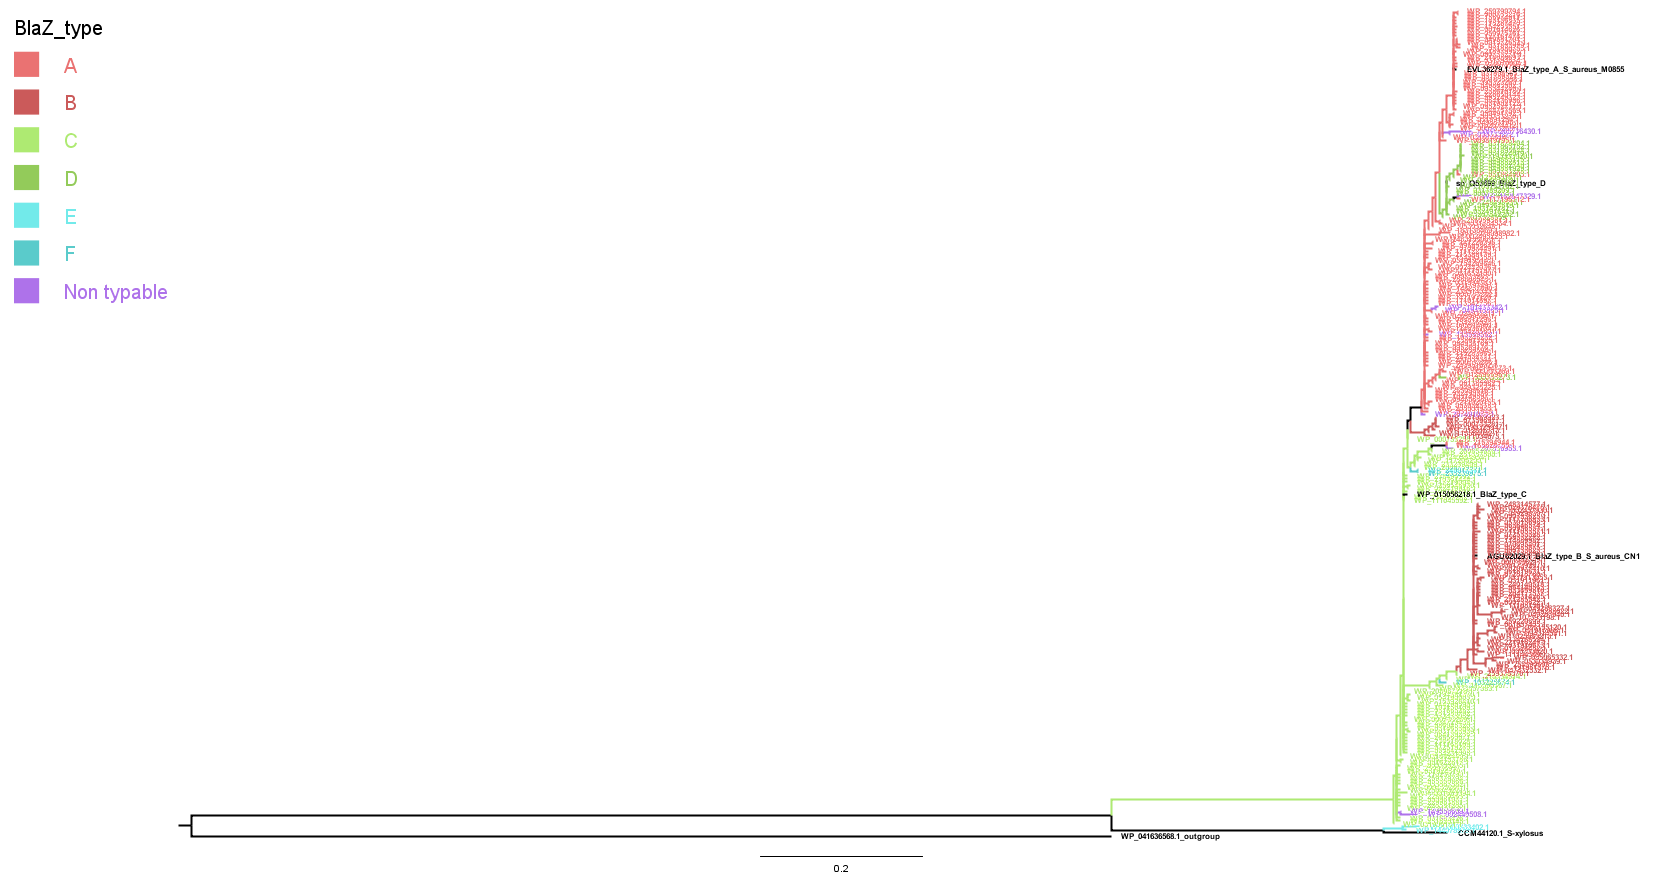

#**RESUMEN**

En este proyecto:

1.   Se buscaron las secuencias de BlaZ de la especie *S. aureus* en la base de datos de proteínas de NCBI (Refseq).(Bio Entrez)
2.   Se descargaron dichas secuencias como archivo multi .fasta (Bio SeqIO) y se alinearon junto con secuencias de referencia de BlaZ pertenecientes a distintos tipos (MAFFT).
3.   Se determinó el tipo y la frecuencia de cada secuencia de BlaZ utilizando técnicas de análisis y visualización de datos (Pandas).
4.   Se encontraron secuencias de BlaZ no tipables que podrían corresponder con nuevas variantes de la enzima (Pandas).
5.   Se analizaron y visualizaron las relaciones filogenéticas entre los distintos tipos de BlaZ encontrados (IQTree, Figtree).






# **CONCLUSIONES**

El proyecto planteado permitió conseguir los objetivos. 

Se planea a futuro automatizar el agregado/eliminación de secuencias de referencia al archivo multifasta.

## Objetivo A

*   Pudieron clasificarse las secuencias proteicas de BlaZ de *S. aureus* presentes en la base de datos de proteínas de Refseq de NCBI.

*   Los tipos de BlaZ mas abundantes entre las secuencias depositadas son BlaZ tipo A, B y C (en orden decreciente).

*   Diez secuencias de BlaZ fueron categorizadas como "Non-typable"(no pudieron ser tipificadas).

## Objetivo B

*   Se logró analizar las relacionas filogenéticas entre las distintas secuencias de BlaZ.

*   BlaZ de los tipos A, B, C, D, y E agrupan con otras del mismo tipo.

*   BlaZ tipo E está filogenéticamente relacionado a BlaZ de *S. xylosus* y no a otros tipos de BlaZ de *S. aureus*.

*   Las secuencias no tipables no forman un grupo monofilético, sino que se encuentran dispersas en la filogenia, y están relacionadas a secuencias de BlaZ de tipo A, tipo C y tipo D.

En futuros experimentos podría evaluarse la eficiencia catalítica de estas variantes de BlaZ no tipables, para determinar si realmente son dos nuevas variantes, si su actividad se relaciona a la de tipos de BlaZ previamente descriptos, y su posible implicancia en el desarrollo del efecto inóculo para cefazolina.

Este dataset de secuencias de Blaz ya tipificadas podrá utilizarse como base de datos en futuros proyectos que evalúen el tipo de BlaZ en genomas de *S. aureus* recolectados en estudios epidemiológicos y su asociación con el desarrollo del efecto inóculo para cefazolina.